#  PROBLEM 1
Understanding the content of the competition

1    What kind of company is home credit?
   
   Ans. This is an international consumer finance provider with operations in nine (9) countries. 
          Its focuses on responsible lending primarily to people with little or no credit history.
     
2    What is expected in this competition?
    
   Ans. To predict the repayment ability of a client from past transaction information 
          and credit bureau information.

3    What are the benefits companies can gain by prediction this?
     
   Ans. They will know who to give loan to after the predicitons.

# PROBLEM 2

Understanding the overview of data

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [2]:
app = pd.read_csv("application_train.csv")

In [3]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


The .head() function allows us to see the first five rows in the dataset, it shows 5 rows and 122 columns.

In [4]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


The .info() function gives us detailed information about our dataset, information such as the ammount of entries, which in this
dataset is 307511 entries. the columns which are 122 and also the data types, for float it has 65, for integer it has 41, and objects is 16.

In [5]:
app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


The .describe() function also give a detailed information about our dataset, but only take or considered columns with numerical data or data that has numbers within there entries. It gives information about the count, mean, standared deviation, the min, max and other usefull infromation.

In [6]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
    return pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
missing_data(app)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
...,...,...
REG_CITY_NOT_LIVE_CITY,0,0.000000
LIVE_REGION_NOT_WORK_REGION,0,0.000000
REG_REGION_NOT_WORK_REGION,0,0.000000
HOUR_APPR_PROCESS_START,0,0.000000


In [7]:
## Number of missing values within the columns
app.isnull().any(axis=0).sum()

67

In [8]:
## Number of missing values within the rows
app.isnull().any(axis=1).sum()

298909

In [9]:
## Drawing the graph
x = app.drop(["TARGET"], axis=1)
y = app.loc[:, "TARGET"]

y.value_counts() ## Shows the number of value of each class

0    282686
1     24825
Name: TARGET, dtype: int64

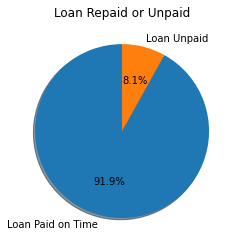

In [10]:
label_counts = y.value_counts()
labels = "Loan Paid on Time", "Loan Unpaid"

plt.title("Loan Repaid or Unpaid")
plt.pie(label_counts, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)
plt.show()


# PROBLEM 3
Problem Setting

1. What is the contract type of the clients?
2. What is the gender of clients that took loans?
3. Does the client own a car or real estate?
4. What is the family status of the clients?
5. The number of children the client who took the loan have?
6. What is the family size of the clients that took the loan?
7. What is the income type of the clients?
8. What are the occupation of clients and organizational type?
9. What is the housing Types of the clients?
10. What is the gender ratio of loan applications and that of successful repayment?
11. What is the educational level of clients?
12. What are the ages of clients and how does it relate to repayment on time?

# PROBLEM 4
Data Exploration

In [11]:
def barplot(feature,name,title):
    f = app[feature].value_counts()
    df = pd.DataFrame({name: f.index, "values": f.values})
    
    plt.title(title)
    
    sns.barplot(x = name, y = "values", data = df)
    fig = plt.gcf()
    fig.set_size_inches(10, 5)
    
    plt.show()

In [21]:
def status(feature):
    pecentage = app[[feature, "TARGET"]].groupby([feature],as_index=False).mean().round(3)
    pecentage.sort_values(by="TARGET", ascending=False, inplace=True)
    return pecentage


1. What is the contract type of the clients?

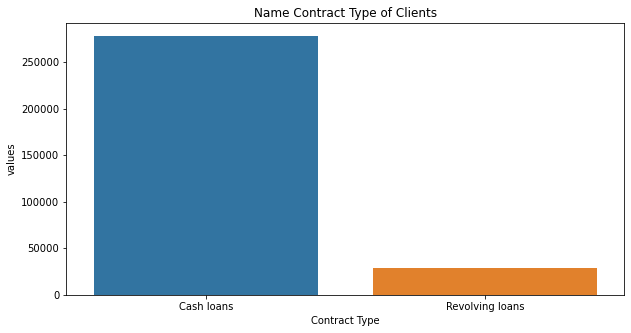

,NAME_CONTRACT_TYPE,TARGET
0,Cash loans,0.083
1,Revolving loans,0.055


In [14]:
barplot("NAME_CONTRACT_TYPE", "Contract Type", "Name Contract Type of Clients")
status("NAME_CONTRACT_TYPE")

Contract type Revolving loans are just a small fraction (10%) from the total number of loans; in the same time, a larger amount of Revolving loans, comparing with their frequency, are not repaid.

2. What is the gender of client that took loan?

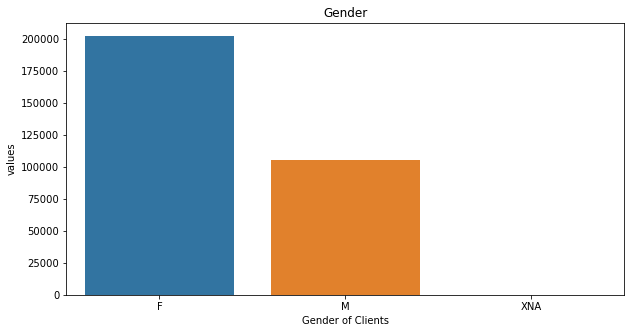

,CODE_GENDER,TARGET
1,M,0.101
0,F,0.070
2,XNA,0.000


In [22]:
barplot("CODE_GENDER", "Gender of Clients", "Gender")
status("CODE_GENDER")

The number of female clients is almost double the number of male clients. Looking to the percent of defaulted credits, males have a higher chance of not returning their loans (-10%), comparing with women (-7%).

3. Does the client own a car or real estate?

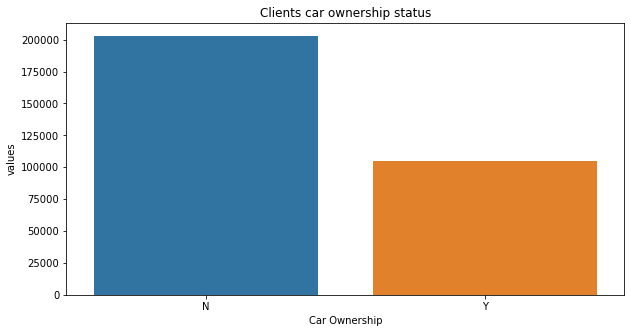

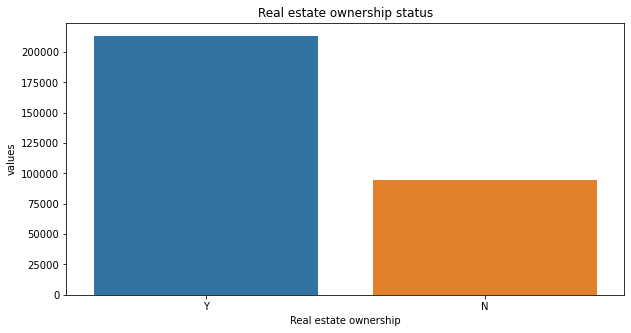

,FLAG_OWN_REALTY,TARGET
0,N,0.083
1,Y,0.080


In [24]:
barplot("FLAG_OWN_CAR", "Car Ownership", "Clients car ownership status")
barplot("FLAG_OWN_REALTY", "Real estate ownership", "Real estate ownership status")
status("FLAG_OWN_CAR")
status("FLAG_OWN_REALTY")

The clients that owns a car are almost a half of the ones that doesn't own one. The clients that owns a car are less likely to not repay a car that the ones that own. Both categories have not-repayment rates around 8%.

The clients that owns real estate are more than double of the ones that doesn't own. Both categories (owning real estate or not owning) have not-repayment rates less than 8%.


4. What is the family status of the clients?

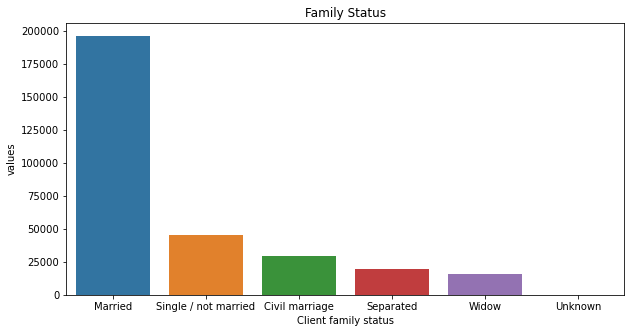

,NAME_FAMILY_STATUS,TARGET
0,Civil marriage,0.099
3,Single / not married,0.098
2,Separated,0.082
1,Married,0.076
5,Widow,0.058
4,Unknown,0.000


In [26]:
barplot("NAME_FAMILY_STATUS", "Client family status", "Family Status")
status("NAME_FAMILY_STATUS")

Most of clients are married, followed by Single/not married and civil marriage.

In terms of percentage of not repayment of loan, Civil marriage has the highest percent of not repayment (10%), with Widow the lowest (exception being Unknown).

5. The number of children the client who took the loan have?

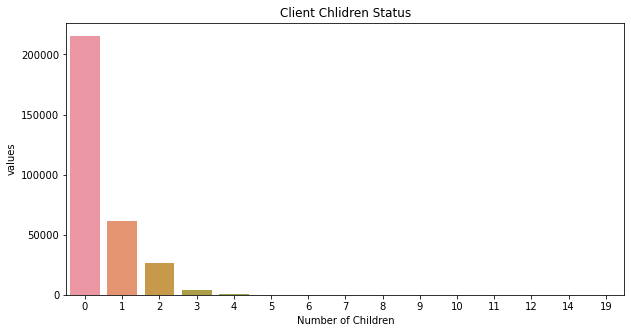

,CNT_CHILDREN,TARGET
9,9,1.000
11,11,1.000
6,6,0.286
4,4,0.128
3,3,0.096
1,1,0.089
2,2,0.087
5,5,0.083
0,0,0.077
7,7,0.000


In [27]:
barplot("CNT_CHILDREN", "Number of Children", "Client Chlidren Status")
status("CNT_CHILDREN")

Most of the clients taking a loan have no children. The number of loans associated with the clients with one children are 4 times smaller, the number of loans associated with the clients with two children are 8 times smaller; clients with 3, 4 or more children are much more rare.

As for repayment, clients with no children, 1, 2, 3, and 5 children have percents of no repayment around the average (10%). The clients with 4 and 6 children are above average in terms of percent of not paid back loans (over 25% for families with 6 children).

As for clients with 9 or 11 children, the percent of loans not repaid is 100%.

6. What is the family size of the clients that took the loan?

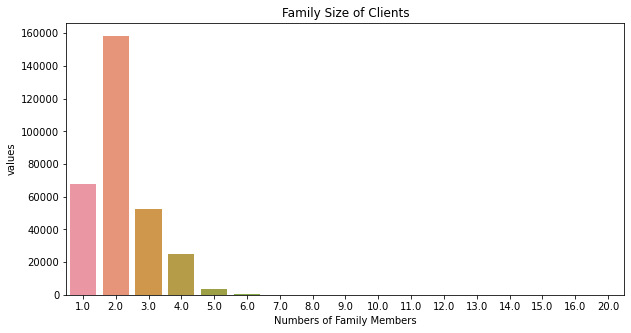

,CNT_FAM_MEMBERS,TARGET
10,11.0,1.000
12,13.0,1.000
9,10.0,0.333
7,8.0,0.300
5,6.0,0.135
4,5.0,0.094
2,3.0,0.088
3,4.0,0.086
0,1.0,0.084
1,2.0,0.076


In [29]:
barplot("CNT_FAM_MEMBERS", "Numbers of Family Members", "Family Size of Clients")
status("CNT_FAM_MEMBERS")

Clients with family members of 2 are most numerous, followed by 1 (single persons), 3 (families with one child) and 4.

Clients with family size of 11 and 13 have 100% not repayment rate. Other families with 10 or 8 members have percents of not repayment of loans over 30%. Families with 6 or less members have repayment rates close to the 10% average.

7. What is the income type of the clients?

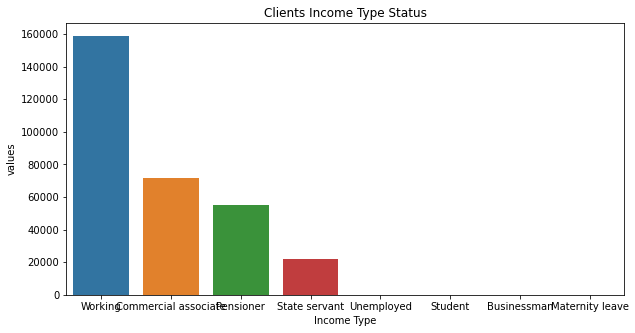

,NAME_INCOME_TYPE,TARGET
2,Maternity leave,0.400
6,Unemployed,0.364
7,Working,0.096
1,Commercial associate,0.075
4,State servant,0.058
3,Pensioner,0.054
0,Businessman,0.000
5,Student,0.000


In [30]:
barplot("NAME_INCOME_TYPE", "Income Type", "Clients Income Type Status")
status("NAME_INCOME_TYPE")

Most of applicants for loans are income from Working, followed by Commercial associate, Pensioner and State servant.

The applicants with the type of income Maternity leave have almost 40% ratio of not returning loans, followed by Unemployed (37%). The rest of types of incomes are under the average of 10% for not returning loans.

8. What are the occupation of clients and organizational type?

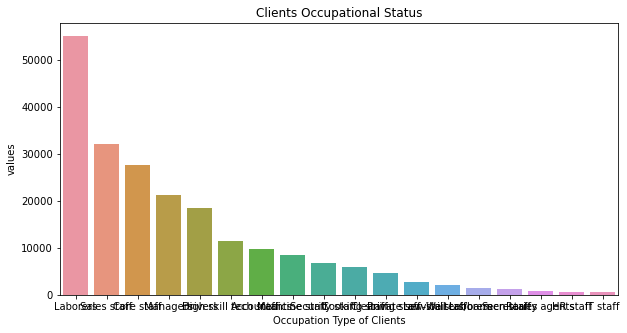

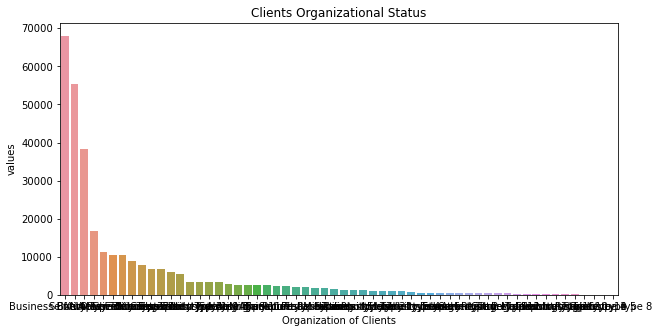

,ORGANIZATION_TYPE,TARGET
54,Transport: type 3,0.158
18,Industry: type 13,0.134
25,Industry: type 8,0.125
7,Construction,0.117
38,Restaurant,0.117
6,Cleaning,0.112
14,Industry: type 1,0.111
20,Industry: type 3,0.106
36,Realtor,0.106
1,Agriculture,0.105


In [32]:
barplot("OCCUPATION_TYPE", "Occupation Type of Clients", "Clients Occupational Status")
barplot("ORGANIZATION_TYPE", "Organization of Clients", "Clients Organizational Status")
status("OCCUPATION_TYPE")
status("ORGANIZATION_TYPE")

Most of the loans are taken by Laborers, followed by Sales staff. IT staff take the lowest amount of loans.

The category with highest percent of not repaid loans are Low-skill Laborers (above 17%), followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff.




Oraganizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%).

9. What is the housing Types of the clients?

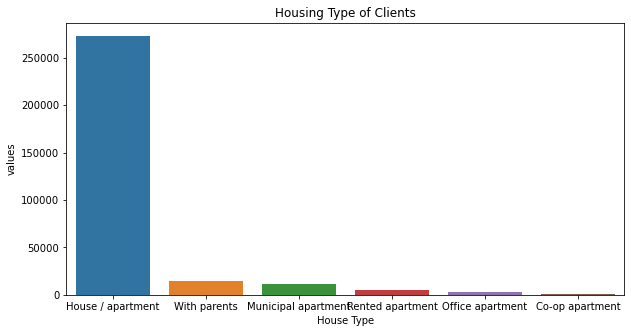

,NAME_HOUSING_TYPE,TARGET
4,Rented apartment,0.123
5,With parents,0.117
2,Municipal apartment,0.085
0,Co-op apartment,0.079
1,House / apartment,0.078
3,Office apartment,0.066


In [33]:
barplot("NAME_HOUSING_TYPE", "House Type", "Housing Type of Clients")
status("NAME_HOUSING_TYPE")

Over 250,000 applicants for credits registered their housing as House/apartment. Following categories have a very small number of clients (With parents, Municipal appartment).

From these categories, Rented apartment and With parents have higher than 10% not-repayment rate.

10. What is the gender ratio of loan applications and that of successful repayment?

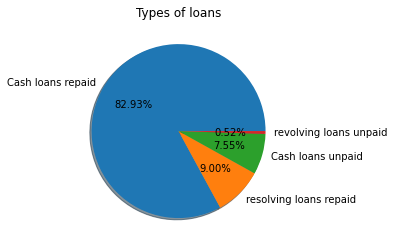

In [34]:
loan_type = app[["TARGET", "NAME_CONTRACT_TYPE"]]

labels = "Cash loans repaid", "resolving loans repaid", "Cash loans unpaid", "revolving loans unpaid"
loan_type.value_counts().plot.pie(labels=labels,shadow=True,autopct="%.2f%%")
plt.ylabel("")
plt.title("Types of loans")
plt.show()

In [39]:
status("NAME_CONTRACT_TYPE")

,NAME_CONTRACT_TYPE,TARGET
0,Cash loans,0.083
1,Revolving loans,0.055


90% of the cash loans are repayable, while the revolving loans compaired to their ovarall pecentage are not repayed.

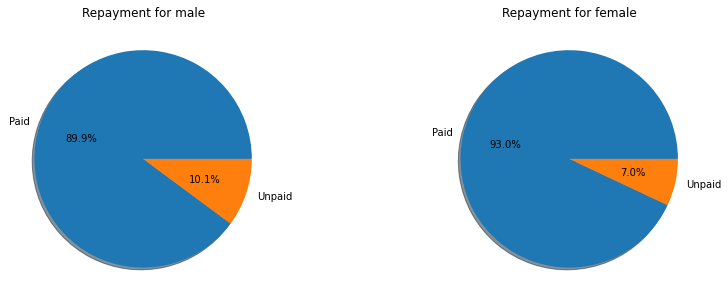

In [36]:
male = app.loc[:, "CODE_GENDER"][app.loc[:, "CODE_GENDER"]== "M"]
female = app.loc[:, "CODE_GENDER"][app.loc[:, "CODE_GENDER"]== "F"]
male_unpaid = app.loc[((app["TARGET"] == 1) & (app["CODE_GENDER"] == "M"))]
female_unpaid = app.loc[((app["TARGET"] == 1) & (app["CODE_GENDER"] == "F"))]
male_paid = len(male) - len(male_unpaid)
female_paid = len(female) - len(female_unpaid)
labels = "Paid", "Unpaid"
samplesM = [male_paid, len(male_unpaid)]
samplesF = [female_paid, len(female_unpaid)]

fig, axes = plt.subplots(1, 2)
axes[0].pie(samplesM, labels=labels, autopct="%1.1f%%", shadow=True)
axes[0].set_title("Repayment for male")

axes[1].pie(samplesF, labels=labels, autopct="%1.1f%%", shadow=True)
axes[1].set_title("Repayment for female")

fig.set_size_inches(14, 5)

plt.show()

In [38]:
status("CODE_GENDER")

,CODE_GENDER,TARGET
1,M,0.101
0,F,0.070
2,XNA,0.000


The number of female clients is bigger than the male clients, but yet still the female are more likely to repay their loans. female (93%) compaired to male (89.9%).

11. What is the educational level of clients?

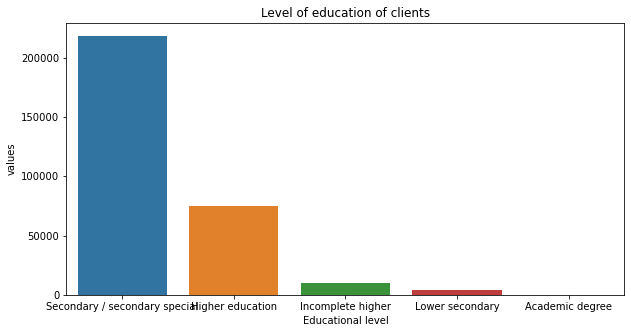

,NAME_EDUCATION_TYPE,TARGET
3,Lower secondary,0.109
4,Secondary / secondary special,0.089
2,Incomplete higher,0.085
1,Higher education,0.054
0,Academic degree,0.018


In [35]:
barplot("NAME_EDUCATION_TYPE", "Educational level", "Level of education of clients")
status("NAME_EDUCATION_TYPE")

Most of the clients have secondary/secondary special education, followed by clients with higher education. Only a handful have an academic degree. The lower secondary category, have the largest rate of not repaying or returning their loans. The clients with the academic degree have less than 2% not repaymeny rate.

12. What are the ages of clients and how does it relate to repayment on time?

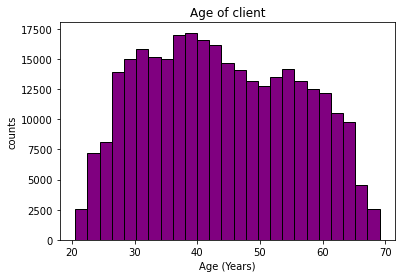

In [37]:
plt.hist(app["DAYS_BIRTH"] / -365, edgecolor = "k", bins = 25, color = "purple")
plt.title("Age of client")
plt.xlabel("Age (Years)")
plt.ylabel("counts")
plt.show()

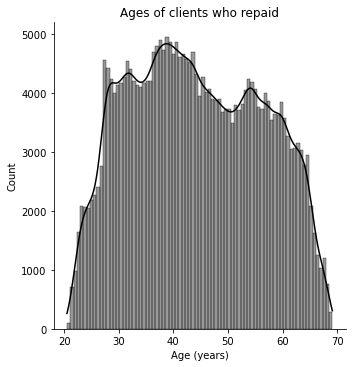

In [41]:
age_paid = app.loc[app["TARGET"] == 0, "DAYS_BIRTH"] / -365
age_unpaid = app.loc[app["TARGET"] == 1, "DAYS_BIRTH"] / -365

sns.displot(age_paid, color="black", alpha=0.4, kde=True, fill=True)
plt.xlabel("Age (years)")
plt.title("Ages of clients who repaid")

plt.show()

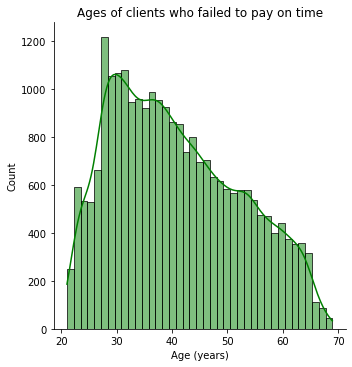

In [42]:
sns.displot(age_unpaid, kde=True, color="green", fill=True)
plt.xlabel("Age (years)")
plt.title("Ages of clients who failed to pay on time")

plt.show()

In [40]:
status("DAYS_BIRTH")

,DAYS_BIRTH,TARGET
17372,-7763,1.0
563,-24585,1.0
144,-25017,1.0
17208,-7934,1.0
41,-25142,1.0
...,...,...
5694,-19453,0.0
5682,-19465,0.0
5678,-19469,0.0
5671,-19476,0.0


20 to 70 is the age range of clinets, with 30 to 45 having the highest numbers. The younger clients between the age of 25 to 40 have the highest chance of not repaying their loans. whereas the older the clients the more likelyhood of repayments of loans